In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.report import generate_report

## Importing data

In [4]:
data = pd.read_csv("./data/preprocessed_body_performance.csv")
data.head()

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,27,0,172.3,75.24,21.3,80,130,54.9,18.4,60,217,3
1,25,0,165.0,55.80,15.7,77,126,36.4,16.3,53,229,1
2,31,0,179.6,78.00,20.1,92,152,44.8,12.0,49,181,3
3,32,0,174.5,71.10,18.4,76,147,41.4,15.2,53,219,2
4,28,0,173.8,67.70,17.1,70,127,43.5,27.1,45,217,2


## SDV imports

In [5]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer

In [6]:
### Creating metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)

In [8]:
## Fitting synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data)

# 3.5 s

In [9]:
synthetic_data = synthesizer.sample(num_rows=len(data))

# 1.0 s

In [10]:
synthetic_data

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,37,0,165.0,60.65,36.478912,74,121,31.48,11.63,25,152,3
1,33,0,161.1,60.39,28.953415,82,127,28.03,24.49,32,161,2
2,38,1,156.2,48.37,33.853630,78,140,20.22,25.26,20,106,3
3,24,0,181.4,71.09,14.279407,68,117,45.45,16.41,41,209,2
4,29,0,174.8,71.58,22.421839,73,134,44.61,16.14,41,191,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11671,23,0,174.1,66.66,17.247061,84,146,38.34,16.55,53,237,2
11672,33,0,161.9,63.66,25.834774,97,159,38.70,18.19,35,170,2
11673,30,0,162.9,58.91,21.818997,55,127,30.30,19.71,36,188,2
11674,28,0,179.3,76.64,9.840237,70,112,50.47,20.18,55,224,1


/home/tiago/Documentos/codigos/DS-Synthesizers/venv/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


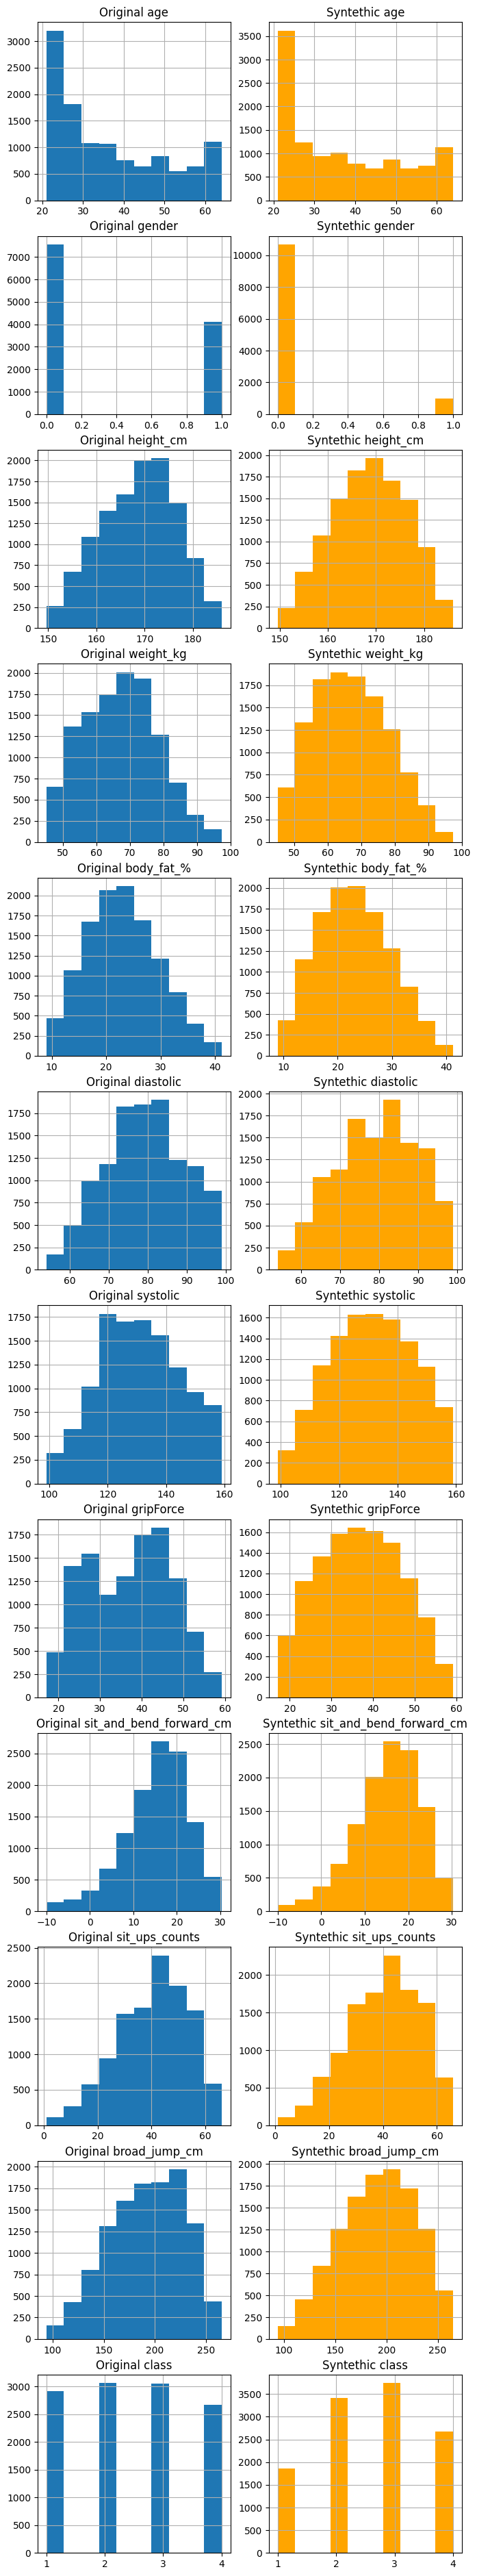

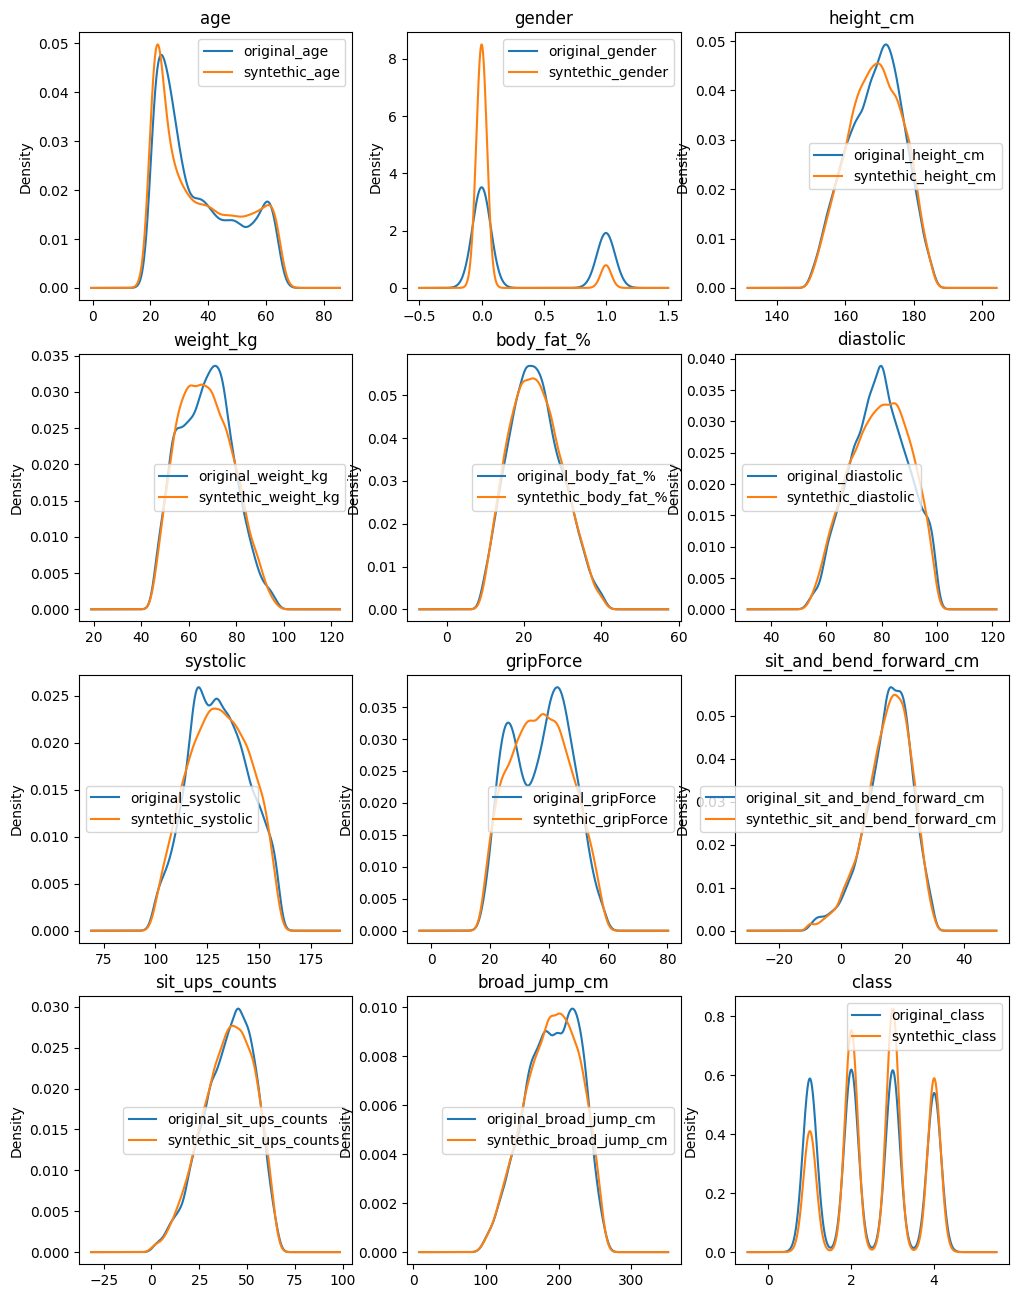

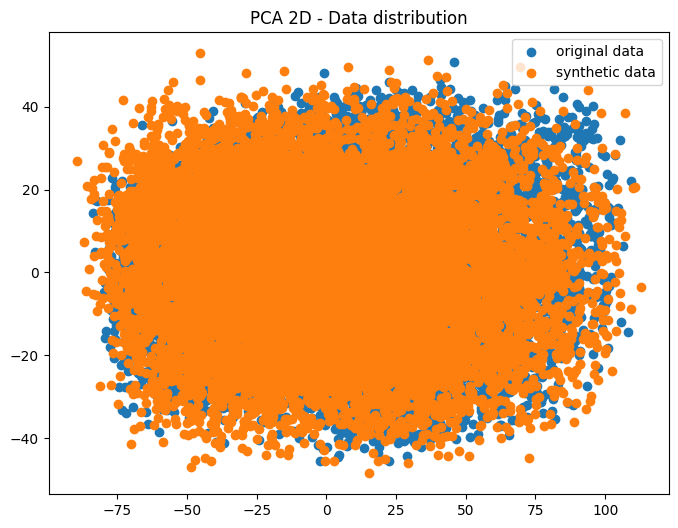

In [12]:
generate_report("GaussianCopula", data, synthetic_data)